### Segment 1: Stocks participated in the Jan 2021 rally -- GameStop, AMC, Bed Bath and Beyond, KOSS, NOKIA, BlackBerry, Robinhood

### Segment 2: Stocks which showed significant change during the Covid Pandemic eg: Zoom, Cisco, DocuSign, Clorox, Uber, Walmart, Costco, Walt Disney, Pfizer, Johnson and Johnson, Moderna

### Segment 3: Large cap Stocks with stable growth. eg: P&G, Walmart, Pfizer, Apple, Alphabet, Microsoft, Tesla, Nvidia, Starbucks, United Health

In [86]:
import os
import re
import time
import csv
import json
import random
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime

# WALMART

In [87]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=WMT&outputsize=full&apikey=72R7IZGL7SOKS4BT&datatype=csv'

with requests.Session() as s:
    download = s.get(url)
    decoded_content = download.content.decode('utf-8')
    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)

np.savetxt("Walmart.csv", decoded_content.splitlines(), delimiter =',', fmt ='% s')

In [88]:
df_Walmart = pd.read_csv("Walmart.csv")

In [89]:
df_Walmart['Date'] = pd.to_datetime(df_Walmart['timestamp'])

In [90]:
df_Walmart['timestamp'] = pd.to_datetime(df_Walmart['timestamp'])

In [91]:
df_Walmart = df_Walmart[(df_Walmart['timestamp'] > '2010-01-01') & (df_Walmart['timestamp'] < '2021-12-12')]

In [92]:
df_Walmart['Date'] = pd.to_datetime(df_Walmart['timestamp'])

In [93]:
df_Walmart.head()

,timestamp,open,high,low,close,volume,Date
48,2021-12-10,138.34,141.30,137.57,141.03,12858541,2021-12-10
49,2021-12-09,136.63,138.57,135.71,138.50,10783902,2021-12-09
50,2021-12-08,138.06,138.50,136.01,137.15,11498754,2021-12-08
51,2021-12-07,139.60,139.83,138.09,138.55,12579666,2021-12-07
52,2021-12-06,137.56,139.36,137.10,139.00,10863131,2021-12-06


# MOVING AVERAGES

### Walmart 20 Days SMA

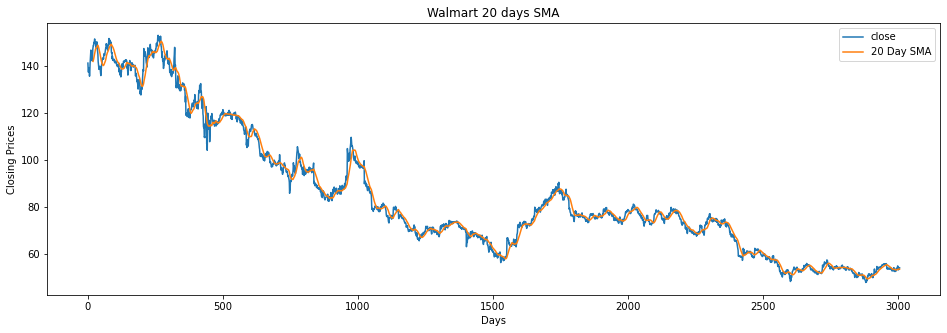

In [94]:
df_Walmart.index = np.arange(df_Walmart.shape[0])
closing_prices = df_Walmart['close']


sma = closing_prices.rolling(20).mean()
df_Walmart.head()

# Plot the data
plt.title('Walmart ' + '20 days SMA')
plt.xlabel('Days')
plt.ylabel('Closing Prices')
closing_prices.plot(figsize=(16,5))
plt.plot(sma, label='20 Day SMA')
plt.legend()
plt.show()

### Walmart 100 Days SMA

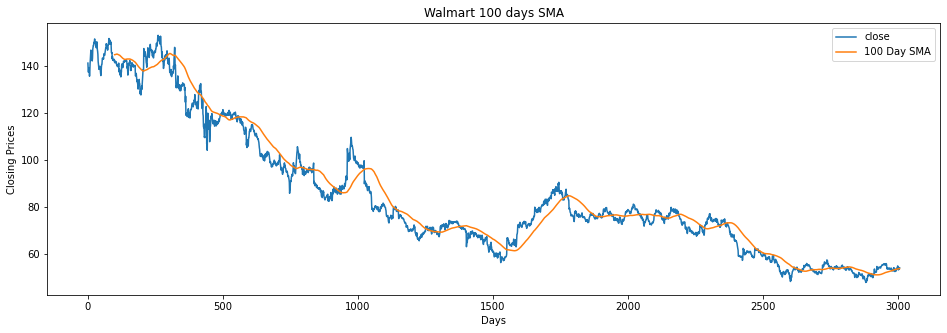

In [95]:
df_Walmart.index = np.arange(df_Walmart.shape[0])
closing_prices = df_Walmart['close']


sma = closing_prices.rolling(100).mean()
df_Walmart.head()

# Plot the data
plt.title('Walmart ' + '100 days SMA')
plt.xlabel('Days')
plt.ylabel('Closing Prices')
closing_prices.plot(figsize=(16,5))
plt.plot(sma, label='100 Day SMA')
plt.legend()
plt.show()

### Walmart 200 Days SMA

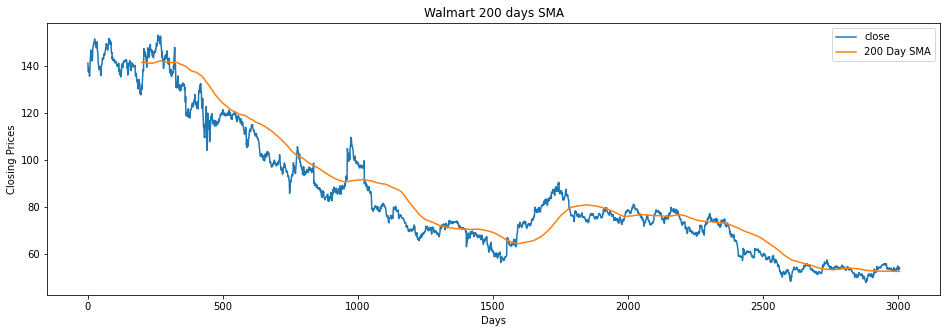

In [96]:
df_Walmart.index = np.arange(df_Walmart.shape[0])
closing_prices = df_Walmart['close']


sma = closing_prices.rolling(200).mean()
df_Walmart.head()

# Plot the data
plt.title('Walmart ' + '200 days SMA')
plt.xlabel('Days')
plt.ylabel('Closing Prices')
closing_prices.plot(figsize=(16,5))
plt.plot(sma, label='200 Day SMA')
plt.legend()
plt.show()

# WALMART BOLLINGER BANDS

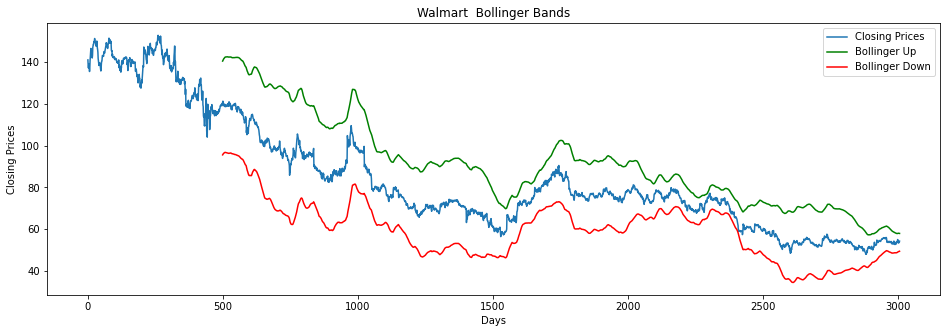

In [97]:
def get_bollinger_bands(prices, rate=500):
    sma = closing_prices.rolling(20).mean()
    std = prices.rolling(rate).std() 
    bollinger_up = sma + std * 2 
    bollinger_down = sma - std * 2
    return bollinger_up, bollinger_down

df_Walmart.index = np.arange(df_Walmart.shape[0])
closing_prices = df_Walmart['close']

bollinger_up, bollinger_down = get_bollinger_bands(closing_prices)

plt.title('Walmart ' + ' Bollinger Bands')
plt.xlabel('Days')
plt.ylabel('Closing Prices')
closing_prices.plot(label='Closing Prices', figsize=(16,5) )
plt.plot(bollinger_up, label='Bollinger Up', c='g')
plt.plot(bollinger_down, label='Bollinger Down', c='r')
plt.legend()
plt.show()

# PFIZER

In [98]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=PFE&outputsize=full&apikey=72R7IZGL7SOKS4BT&datatype=csv'

with requests.Session() as s:
    download = s.get(url)
    decoded_content = download.content.decode('utf-8')
    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)

np.savetxt("Pfizer.csv", decoded_content.splitlines(), delimiter =',', fmt ='% s')

In [99]:
df_Pfizer = pd.read_csv("Pfizer.csv")

In [100]:
df_Pfizer['timestamp'] = pd.to_datetime(df_Pfizer['timestamp'])

In [101]:
df_Pfizer = df_Pfizer[(df_Pfizer['timestamp'] > '2010-01-01') & (df_Pfizer['timestamp'] < '2021-12-12')]

In [102]:
df_Pfizer['Date'] = pd.to_datetime(df_Pfizer['timestamp'])

In [103]:
df_Pfizer.head()

,timestamp,open,high,low,close,volume,Date
48,2021-12-10,51.20,52.8500,51.11,52.78,26079361,2021-12-10
49,2021-12-09,51.51,52.8450,51.51,52.08,38325661,2021-12-09
50,2021-12-08,52.75,53.0800,51.03,51.40,37429199,2021-12-08
51,2021-12-07,51.25,52.4999,50.40,51.72,41575442,2021-12-07
52,2021-12-06,53.78,53.8900,51.25,51.48,53723978,2021-12-06


# MOVING AVERAGES

### Pfizer 20 Days SMA

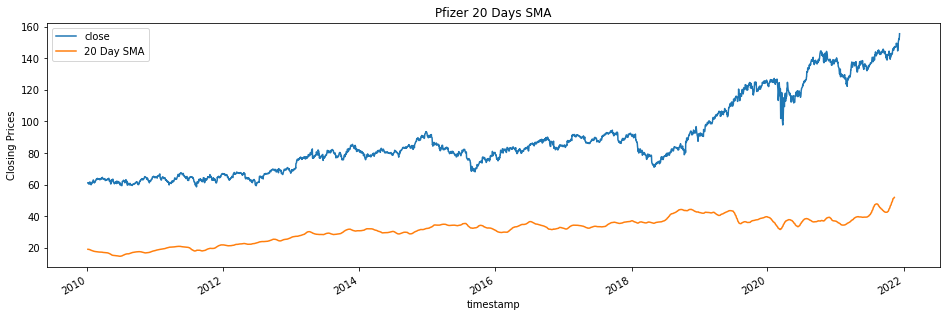

In [104]:

# Setting the timestamp column as the index for helping the plotting in years instead of days
df_Pfizer.set_index('timestamp', inplace=True)
df_Pfizer.index = pd.to_datetime(df_Pfizer.index)

pfizer_closing_prices = df_Pfizer['close']


pfizer_sma = pfizer_closing_prices.rolling(20).mean()

# Plot the data
plt.title('Pfizer ' + '20 Days SMA')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
pg_closing_prices.plot(figsize=(16,5))
plt.plot(pfizer_sma, label='20 Day SMA')
plt.legend()
plt.show()

### Pfizer 100 Days SMA

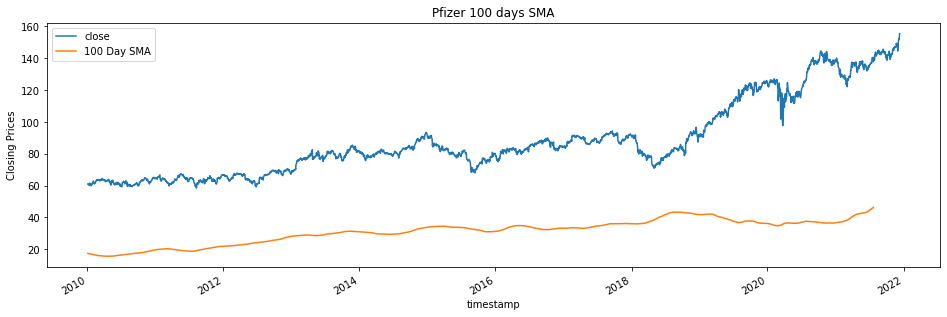

In [105]:
pfizer_closing_prices = df_Pfizer['close']
pfizer_sma = pfizer_closing_prices.rolling(100).mean()

# Plot the data
plt.title('Pfizer ' + '100 days SMA')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
pg_closing_prices.plot(figsize=(16,5))
plt.plot(pfizer_sma, label='100 Day SMA')
plt.legend()
plt.show()

### Pfizer 200 Days SMA

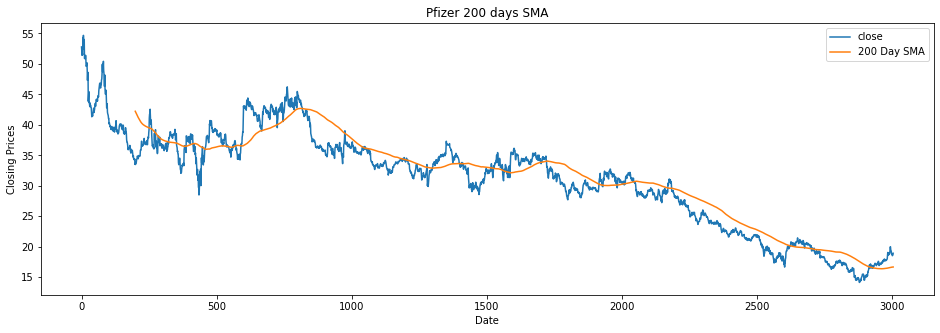

In [107]:
pfizer_closing_prices = df_Pfizer['close']


pfizer_sma = pfizer_closing_prices.rolling(200).mean()

# Plot the data
plt.title('Pfizer ' + '200 days SMA')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
pfizer_closing_prices.plot(figsize=(16,5))
plt.plot(pfizer_sma, label='200 Day SMA')
plt.legend()
plt.show()

# PFIZER BOLLINGER BANDS

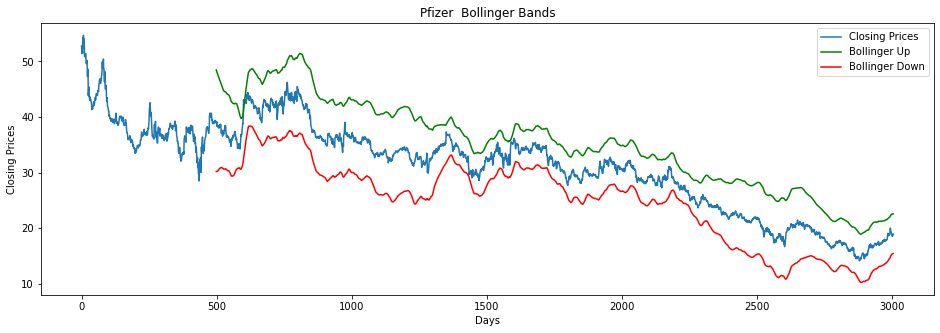

In [108]:
def get_bollinger_bands(prices, rate=500):
    sma = closing_prices.rolling(20).mean()
    std = prices.rolling(rate).std() 
    bollinger_up = sma + std * 2 
    bollinger_down = sma - std * 2
    return bollinger_up, bollinger_down

df_Pfizer.index = np.arange(df_Pfizer.shape[0])
closing_prices = df_Pfizer['close']

bollinger_up, bollinger_down = get_bollinger_bands(closing_prices)

plt.title('Pfizer ' + ' Bollinger Bands')
plt.xlabel('Days')
plt.ylabel('Closing Prices')
closing_prices.plot(label='Closing Prices', figsize=(16,5) )
plt.plot(bollinger_up, label='Bollinger Up', c='g')
plt.plot(bollinger_down, label='Bollinger Down', c='r')
plt.legend()
plt.show()

# P&G

In [109]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=PG&outputsize=full&apikey=72R7IZGL7SOKS4BT&datatype=csv'

with requests.Session() as s:
    download = s.get(url)
    decoded_content = download.content.decode('utf-8')
    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)

np.savetxt("P&G.csv", decoded_content.splitlines(), delimiter =',', fmt ='% s')

In [110]:
df_PG = pd.read_csv("P&G.csv")

In [111]:
df_PG['timestamp'] = pd.to_datetime(df_PG['timestamp'])

In [112]:
df_PG = df_PG[(df_PG['timestamp'] > '2010-01-01') & (df_PG['timestamp'] < '2021-12-12')]

In [113]:
df_PG['Date'] = pd.to_datetime(df_PG['timestamp'])

In [114]:
df_PG.head()

,timestamp,open,high,low,close,volume,Date
48,2021-12-10,153.855,155.800,153.43,155.46,7172321,2021-12-10
49,2021-12-09,152.310,154.190,151.60,153.32,8334318,2021-12-09
50,2021-12-08,151.670,152.660,150.28,152.43,8329342,2021-12-08
51,2021-12-07,151.945,152.580,151.27,151.75,7913393,2021-12-07
52,2021-12-06,150.190,152.385,150.19,152.15,11935078,2021-12-06


# MOVING AVERAGES

### P&G 20 Days SMA

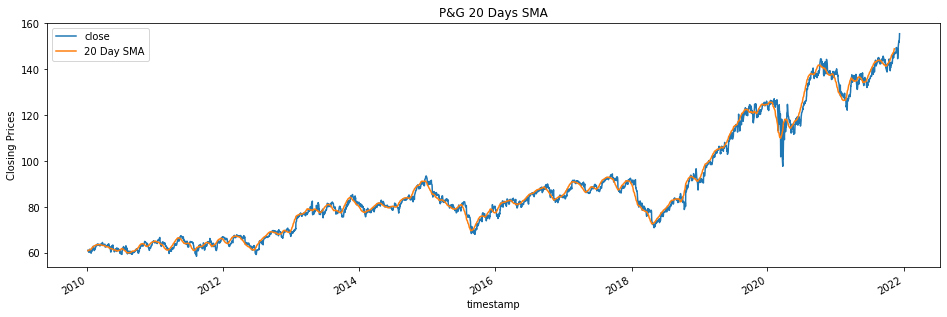

In [115]:

# Setting the timestamp column as the index for helping the plotting in years instead of days
df_PG.set_index('timestamp', inplace=True)
df_PG.index = pd.to_datetime(df_PG.index)

pg_closing_prices = df_PG['close']


pg_sma = pg_closing_prices.rolling(20).mean()

# Plot the data
plt.title('P&G ' + '20 Days SMA')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
# plt.plot(bb_closing_prices, label='Closing Prices')
pg_closing_prices.plot(figsize=(16,5))
plt.plot(pg_sma, label='20 Day SMA')
plt.legend()
plt.show()

### P&G 100 Days SMA

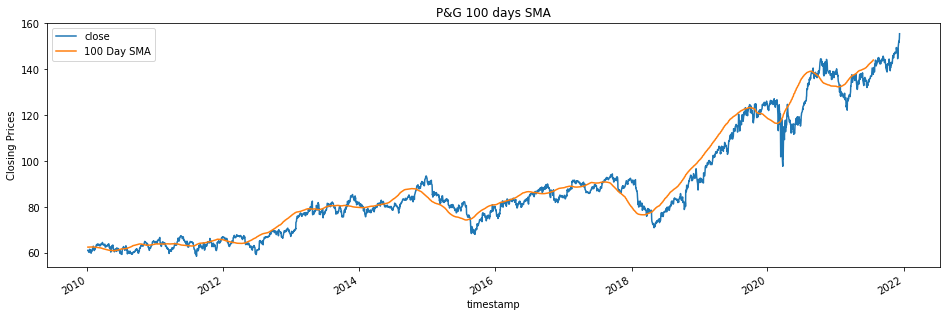

In [116]:

# Setting the timestamp column as the index for helping the plotting in years instead of days


pg_closing_prices = df_PG['close']


pg_sma = pg_closing_prices.rolling(100).mean()

# Plot the data
plt.title('P&G ' + '100 days SMA')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
# plt.plot(bb_closing_prices, label='Closing Prices')
pg_closing_prices.plot(figsize=(16,5))
plt.plot(pg_sma, label='100 Day SMA')
plt.legend()
plt.show()

### P&G 200 Days SMA

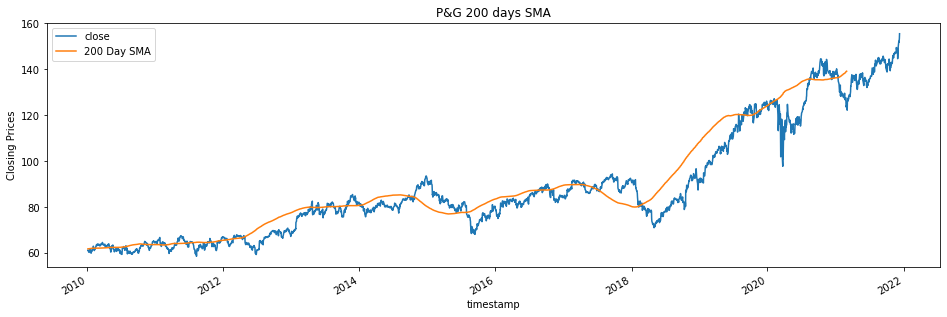

In [117]:

# Setting the timestamp column as the index for helping the plotting in years instead of days


pg_closing_prices = df_PG['close']


pg_sma = pg_closing_prices.rolling(200).mean()

# Plot the data
plt.title('P&G ' + '200 days SMA')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
# plt.plot(bb_closing_prices, label='Closing Prices')
pg_closing_prices.plot(figsize=(16,5))
plt.plot(pg_sma, label='200 Day SMA')
plt.legend()
plt.show()

# P&G BOLLINGER BANDS

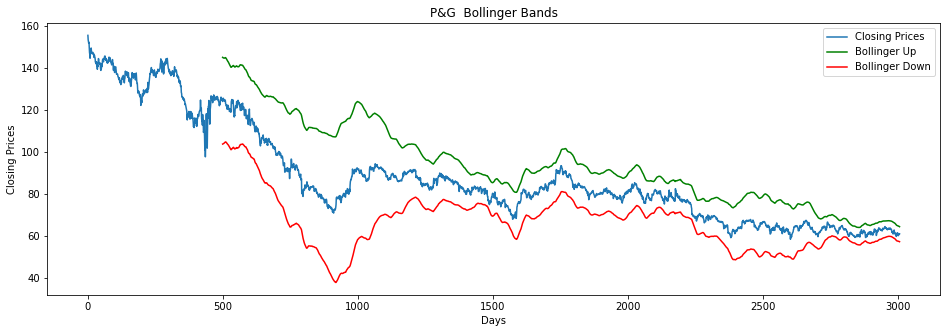

In [118]:


def get_bollinger_bands(prices, rate=500):
    sma = closing_prices.rolling(20).mean()
    std = prices.rolling(rate).std() 
    bollinger_up = sma + std * 2 
    bollinger_down = sma - std * 2
    return bollinger_up, bollinger_down

df_PG.index = np.arange(df_PG.shape[0])
closing_prices = df_PG['close']

bollinger_up, bollinger_down = get_bollinger_bands(closing_prices)

plt.title('P&G ' + ' Bollinger Bands')
plt.xlabel('Days')
plt.ylabel('Closing Prices')
closing_prices.plot(label='Closing Prices', figsize=(16,5) )
plt.plot(bollinger_up, label='Bollinger Up', c='g')
plt.plot(bollinger_down, label='Bollinger Down', c='r')
plt.legend()
plt.show()